# **Week 1: Introduction to Data Wrangling and Visualisation in R**
```
.------------------------------------.
|   __  ____  ______  _  ___ _____   |
|  |  \/  \ \/ / __ )/ |/ _ \___  |  |
|  | |\/| |\  /|  _ \| | | | | / /   |
|  | |  | |/  \| |_) | | |_| |/ /    |
|  |_|  |_/_/\_\____/|_|\___//_/     |
'------------------------------------'

```


This week, we will dive into data wrangling and data visualisation in R using the `dplyr` and `ggplot2` packages. If you are not familiar with basic R data types and operations, please take some time to review [Week 0](https://colab.research.google.com/github/edelweiss611428/MXB107-Notebooks/blob/main/notebooks/Week_0.ipynb) content.

## **Pre-Configurating the Notebook**

### **Switching to the R Kernel on Colab**

By default, Google Colab uses Python as its programming language. To use R instead, you’ll need to manually switch the kernel by going to **Runtime > Change runtime type**, and selecting R as the kernel. This allows you to run R code in the Colab environment.

However, our notebook is already configured to use R by default. Unless something goes wrong, you shouldn’t need to manually change runtime type.

### **Importing Required Datasets and Packages**
**Run the following lines of code**:

In [1]:
#Do not modify

setwd("/content")

# Remove `MXB107-Notebooks` if exists,
if (dir.exists("MXB107-Notebooks")) {
  system("rm -rf MXB107-Notebooks")
}

# Fork the repository
system("git clone https://github.com/edelweiss611428/MXB107-Notebooks.git")

# Change working directory to "MXB107-Notebooks"
setwd("MXB107-Notebooks")

#
invisible(source("R/preConfigurated.R"))

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: stringr

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: IRdisplay

Loading required package: png

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘png’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: grid



**Do not modify the following**:

In [2]:
if (!require("testthat")) install.packages("testthat"); library("testthat")

test_that("Test if all packages have been loaded", {

  expect_true(all(c("ggplot2", "tidyr", "dplyr", "stringr", "magrittr") %in% loadedNamespaces()))

})

test_that("Test if all utility functions have been loaded", {
  expect_true(exists("skewness"))
  expect_true(exists("kurtosis"))
})

Loading required package: testthat


Attaching package: ‘testthat’


The following objects are masked from ‘package:magrittr’:

    equals, is_less_than, not


The following object is masked from ‘package:tidyr’:

    matches


The following object is masked from ‘package:dplyr’:

    matches




Test passed 🎊
Test passed 🥇


## **Data Wrangling in R via `dplyr` and `magrittr`**

Data wrangling is the process of cleaning, transforming, and reshaping data for analysis. The `dplyr` package, often used with the pipe operator `%>%` from `magrittr`, provides a set of intuitive functions for these tasks.

### **Can We Do This in Base R?**

Yes, but the syntax tends to be more verbose and less readable. For demonstration, we will load the CSV file `MXB107_2025.csv`.

In [3]:
MXB107_Info = read.csv("./datasets/MXB107_2025.csv")
str(MXB107_Info)

'data.frame':	12 obs. of  8 variables:
 $ Class         : chr  "LEC01 01" "LEC01 01" "PRC01 01" "PRC01 01" ...
 $ Type          : chr  "Lecture (Internal)" "Lecture (Online)" "Practical (Online)" "Practical (Internal)" ...
 $ Day           : chr  "Wed" "Wed" "Wed" "Thu" ...
 $ Location      : chr  "GP B117" "Online" "Online" "GP D413" ...
 $ Limit         : int  240 1000 30 35 30 35 25 30 35 35 ...
 $ Teaching_Staff: chr  "Chris Drovandi" "Chris Drovandi" "Narayan Srinivasan" "Narayan Srinivasan" ...
 $ From          : int  11 11 16 16 16 9 14 9 9 11 ...
 $ To            : int  13 13 18 18 18 11 16 11 11 13 ...


We want to extract all classes that start after 9:00 AM on either Thursday or Friday and are not online.

In [4]:
notOnline = MXB107_Info$Location != "Online"
onThursday = MXB107_Info$Day %in% c("Thu", "Fri")
startAfter9AM = MXB107_Info$From > 9
subset(MXB107_Info, notOnline & onThursday & startAfter9AM)

,Class,Type,Day,Location,Limit,Teaching_Staff,From,To
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>
4,PRC01 01,Practical (Internal),Thu,GP D413,35,Narayan Srinivasan,16,18
7,PRC01 07,Practical (Internal),Thu,GP S520,25,Ryan Kelly,14,16
10,PRC01 04,Practical (Internal),Fri,GP G216,35,Arwen Nugteren,11,13
11,PRC01 05,Practical (Internal),Fri,GP S502,35,Arwen Nugteren,15,17
12,PRC01 06,Practical (Internal),Fri,GP S519,35,Minh Long Nguyen,15,17


### **Defining a Data-Processing Pipeline**

The `dplyr` and `magrittr` packages simplify and streamline data manipulation by providing a data-processing pipeline.

When we write

```
input %>% do_something_1() %>% do_something_2()
```

The pipe operator %>% takes the output from the expression on the left and passes it as the **first argument** to the function on the right. This allows chaining multiple operations in a clear, readable sequence.


In base R, it would be something like

```
output1 = do_something_1(input)
output2 = do_something_2(output1)
```
Which one looks better to you?




Another great feature of `dplyr` is that it natively understands data frame columns by internally converting data frames into **tibbles** — a more user-friendly data frame format.

This means we don’t need to repeatedly write `MXB107_Info$From` or similar; inside `dplyr` **verbs** like `filter()`, we can simply refer to columns by their names, such as `From` and `To`, which makes the code much cleaner and easier to read.

In [5]:
MXB107_Info %>%
  filter(Location != "Online",
         Day %in% c("Thu", "Fri"),
         From > 9) -> results
print(results)

     Class                 Type Day Location Limit     Teaching_Staff From To
1 PRC01 01 Practical (Internal) Thu  GP D413    35 Narayan Srinivasan   16 18
2 PRC01 07 Practical (Internal) Thu  GP S520    25         Ryan Kelly   14 16
3 PRC01 04 Practical (Internal) Fri  GP G216    35     Arwen Nugteren   11 13
4 PRC01 05 Practical (Internal) Fri  GP S502    35     Arwen Nugteren   15 17
5 PRC01 06 Practical (Internal) Fri  GP S519    35   Minh Long Nguyen   15 17


That indeed looks much better! Here the right-arrow assignment operator really shines.

### **Common `dplyr` Verbs**

#### **`filter()` — subset rows by condition**

Which sessions are classified as internal lectures in the schedule?

In [6]:
MXB107_Info %>%
  filter(Type == "Lecture (Internal)")

Class,Type,Day,Location,Limit,Teaching_Staff,From,To
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>
LEC01 01,Lecture (Internal),Wed,GP B117,240,Chris Drovandi,11,13


Which practical sessions are scheduled on Wednesday?

In [7]:
MXB107_Info %>%
  filter(str_detect(Type, "Practical"), #base R: str_detect(MXB107_Info$Type, pattern = "Practical")
         Day == "Wed")

Class,Type,Day,Location,Limit,Teaching_Staff,From,To
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>
PRC01 01,Practical (Online),Wed,Online,30,Narayan Srinivasan,16,18


#### **`select()` — pick specific columns**

Which classes does Chris Drovandi teach, and when and where are they scheduled?

In [8]:
MXB107_Info %>%
  filter(Teaching_Staff == "Chris Drovandi") %>%
  select(Class, Teaching_Staff, Day, Location, From, To)

Class,Teaching_Staff,Day,Location,From,To
<chr>,<chr>,<chr>,<chr>,<int>,<int>
LEC01 01,Chris Drovandi,Wed,GP B117,11,13
LEC01 01,Chris Drovandi,Wed,Online,11,13


#### **`mutate()` — add or modify columns**

How long is each Wednesday session, and what are their other scheduled details?

In [9]:
MXB107_Info %>%
  filter(Day == "Wed") %>%
  mutate(Duration = To-From)

Class,Type,Day,Location,Limit,Teaching_Staff,From,To,Duration
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>
LEC01 01,Lecture (Internal),Wed,GP B117,240,Chris Drovandi,11,13,2
LEC01 01,Lecture (Online),Wed,Online,1000,Chris Drovandi,11,13,2
PRC01 01,Practical (Online),Wed,Online,30,Narayan Srinivasan,16,18,2


#### **`arrange()` — reorder rows by column(s)**

Which sessions are scheduled on Wednesday, and how do they compare in the number of scheduled students (`Limit`), arranged from smallest to largest?

In [10]:
MXB107_Info %>%
  filter(Day == "Wed") %>%
  arrange(Limit) #Ascending order

Class,Type,Day,Location,Limit,Teaching_Staff,From,To
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>
PRC01 01,Practical (Online),Wed,Online,30,Narayan Srinivasan,16,18
LEC01 01,Lecture (Internal),Wed,GP B117,240,Chris Drovandi,11,13
LEC01 01,Lecture (Online),Wed,Online,1000,Chris Drovandi,11,13


#### **`group_by()` and `summarise()` — group data and aggregate**

For each day of the week, how many students are scheduled in total, what is the average number of students per session, and how many sessions are there?

In [15]:
MXB107_Info %>%
  group_by(Day) %>%
  summarise(totalLimit = sum(Limit),
            averageLimit = mean(Limit),
            Count = n(),
            .groups = "drop") #Set `.group = "drop"` after completion.


Day,totalLimit,averageLimit,Count
<chr>,<int>,<dbl>,<int>
Fri,140,35.0000,4
Thu,155,31.0000,5
Wed,1270,423.3333,3


#### **`rename()` — rename columns**

In [14]:
MXB107_Info %>%
  rename(Start = From, End = To) %>%
  head(3)

,Class,Type,Day,Location,Limit,Teaching_Staff,Start,End
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>
1,LEC01 01,Lecture (Internal),Wed,GP B117,240,Chris Drovandi,11,13
2,LEC01 01,Lecture (Online),Wed,Online,1000,Chris Drovandi,11,13
3,PRC01 01,Practical (Online),Wed,Online,30,Narayan Srinivasan,16,18


#### **`slice()` — select rows by position**

In [13]:
MXB107_Info %>%
  slice(1:3) #Similar to indexing

Class,Type,Day,Location,Limit,Teaching_Staff,From,To
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>
LEC01 01,Lecture (Internal),Wed,GP B117,240,Chris Drovandi,11,13
LEC01 01,Lecture (Online),Wed,Online,1000,Chris Drovandi,11,13
PRC01 01,Practical (Online),Wed,Online,30,Narayan Srinivasan,16,18


Some relevant verbs include:
- `slice_max(data, order_by, n)`: extracts the top `n` rows from data with the highest values in the `order_by` column.
- `slice_min(data, order_by, n)`: extracts the bottom `n` rows from data with the lowest values in the `order_by` column.

#### **`distinct()` — get unique rows by columns**


Who are the unique teaching staff members listed in the dataset?

In [16]:
MXB107_Info %>%
  distinct(Teaching_Staff)

Teaching_Staff
<chr>
Chris Drovandi
Narayan Srinivasan
Oliver Vu
Minh Long Nguyen
Ryan Kelly
Nicholas Gecks-Preston
Arwen Nugteren


#### **`pivot_longer()` — reshapes wide-format data into long format**

We are often more familiar with wide-format data, where each row represents an observation and each column represents a variable or feature.

However, in many situations — particularly for modelling, statistical analysis, and plotting — it is more convenient or even required to work with data in long format. In long format, each row corresponds to a single measurement or value, along with its associated identifiers.

For example, this data frame is in wide-format.

In [17]:
MXB107_Info %>%
  select(Class, Teaching_Staff, From, To) %>%
  head(3) %>%
  mutate(id = row_number())

,Class,Teaching_Staff,From,To,id
,<chr>,<chr>,<int>,<int>,<int>
1,LEC01 01,Chris Drovandi,11,13,1
2,LEC01 01,Chris Drovandi,11,13,2
3,PRC01 01,Narayan Srinivasan,16,18,3


To convert this to long-format, we can use `pivot_longer()`:

In [18]:
MXB107_Info %>%
  select(Class, Teaching_Staff, From, To) %>%
  head(3) %>%
  mutate(id = row_number()) %>%
  pivot_longer(
    cols = c(From, To),
    names_to = "timeType",
    values_to = "Hour"
  )

Class,Teaching_Staff,id,timeType,Hour
<chr>,<chr>,<int>,<chr>,<int>
LEC01 01,Chris Drovandi,1,From,11
LEC01 01,Chris Drovandi,1,To,13
LEC01 01,Chris Drovandi,2,From,11
LEC01 01,Chris Drovandi,2,To,13
PRC01 01,Narayan Srinivasan,3,From,16
PRC01 01,Narayan Srinivasan,3,To,18


We observe that the number of rows has doubled. This is because the original `From` and `To` columns have been reshaped into a single column called `Hour`, with a corresponding column `timeType` indicating whether the value refers to the start or end time.

Instead of storing both `From` and `To` in the same row, each is now represented as a separate row — one for the start time and one for the end time. This structure is characteristic of long format data. If you are familiar with databases, now `<id, timeType>` becomes the new `key` (identifier).

Long-format data frames are less memory-efficient but more convenient for many modelling, statistical analysis, and data visualisation tasks.

Suppose you want to predict the 2023 math grades of Alice, Bob, and Jane using `Year` as a predictor. However, the data is currently in wide format (`grade_wide`). This format is not ideal for modelling or prediction tasks where you want to use `Year` as a predictor variable, because each year is a different column instead of being a value in a single variable.

In [19]:
grade_wide = data.frame(
  Name = c("Alice", "Bob", "Jane"),
  `2020` = c(88, 75, 93),
  `2021` = c(90, 78, 95),
  `2022` = c(92, 82, 97),
   check.names = FALSE
)
grade_wide

Name,2020,2021,2022
<chr>,<dbl>,<dbl>,<dbl>
Alice,88,90,92
Bob,75,78,82
Jane,93,95,97


Converting the data to the long format simplifies the modelling process. Now you can easily fit a statistical model to predict `Grade` (e.g., `%>% lm(Grade ~ Year + Name)` —  a linear regression model with `Grade` being the response variable and `Name` and `Year` being the predictors).

In [20]:
grade_wide %>%
  pivot_longer(
    cols = `2020`:`2022`,
    names_to = "Year",
    values_to = "Grade") %>%
  mutate(Year = as.integer(Year))


Name,Year,Grade
<chr>,<int>,<dbl>
Alice,2020,88
Alice,2021,90
Alice,2022,92
Bob,2020,75
Bob,2021,78
Bob,2022,82
Jane,2020,93
Jane,2021,95
Jane,2022,97


In [21]:
grade_wide %>%
  pivot_longer(
    cols = `2020`:`2022`,
    names_to = "Year",
    values_to = "Grade") %>%
  mutate(Year = as.integer(Year)) %>%
  lm(formula = Grade ~ Year + Name) %>%
  summary()


Call:
lm(formula = Grade ~ Year + Name, data = .)

Residuals:
         1          2          3          4          5          6          7 
 5.000e-01  6.745e-15 -5.000e-01 -8.333e-01 -3.333e-01  1.167e+00  5.000e-01 
         8          9 
-3.053e-16 -5.000e-01 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4962.5000   656.6092  -7.558 0.000643 ***
Year            2.5000     0.3249   7.695 0.000591 ***
NameBob       -11.6667     0.6498 -17.955 9.84e-06 ***
NameJane        5.0000     0.6498   7.695 0.000591 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7958 on 5 degrees of freedom
Multiple R-squared:  0.9934,	Adjusted R-squared:  0.9894 
F-statistic: 250.7 on 3 and 5 DF,  p-value: 7.201e-06


A `pivot_wider()` counterpart exists. We will discuss it later.

#### **Exercise**

How many classes are held online vs in-person for each type (Lecture, Practical)?

In [ ]:
MXB107_Info %>%
  mutate(Mode = ifelse("Online", "Inperson", "Internal"))


<details>
<summary>▶️ Click to show the solution</summary>

```r
MXB107_Info %>%
  mutate(Mode = ifelse(Location == "Online", "Online", "In-Person")) %>%
  group_by(Type, Mode) %>%
  summarize(Count = n(), .groups = "drop") %>%
  arrange(Type, Mode)
```

</details>

## **Data Visualisation via `ggplot2'**

`ggplot2` is a powerful and widely-used R package for data visualisation based on the "Grammar of Graphics" concept. It allows you to create complex and elegant plots by layering components step-by-step.

Key features of `ggplot2`:

- **Layered approach**: Build plots by adding layers like stacking LEGO blocks.
- **Consistent syntax**: Uses a clear, declarative style making plots easy to read and modify.
- **Highly customisable**: Control every detail of your plot’s appearance.
- **Works well with "tidy" data**: Designed to work seamlessly with data in long format.

### **Basic Data Visualisation Principles**

Depending on how we create graphical depictions of data, we can alter the viewer’s impression of the data; in other words, if a picture is worth a thousand words, then how we make the picture can change the story. Ideally, we want our graphical summaries to be as objective as possible; we want the data to speak for themselves. There are no hard and fast rules for creating graphical summaries. Still, there are some basic principles to follow:

- Always have a title for your graphical summary.
- Titles should accurately describe the variables and the relationship shown in the summary. If one of the axes is time or the data are for a specific period, that should be in the title.
- Clearly label the axes and include units.
When comparing two data sets, the axes for each summary should match.


### **`iris` dataset**

To demonstrate the use of `ggplot2`, we will use a new dataset named `iris`, a classic dataset containing measurements of `Sepal.Length`, `Sepal.Width`, `Petal.Length`, and `Petal.Width` for three `Species` of iris flowers.

In [22]:
iris = read.csv("./datasets/iris.csv")
iris %>% head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


### **Stacking LEGO Blocks**

Think of building a plot in `ggplot2` like stacking LEGO blocks, where each block adds something new.


#### **First LEGO Block: Data**

`iris %>% ggplot()` tells `ggplot2` that we will use data from `iris`.

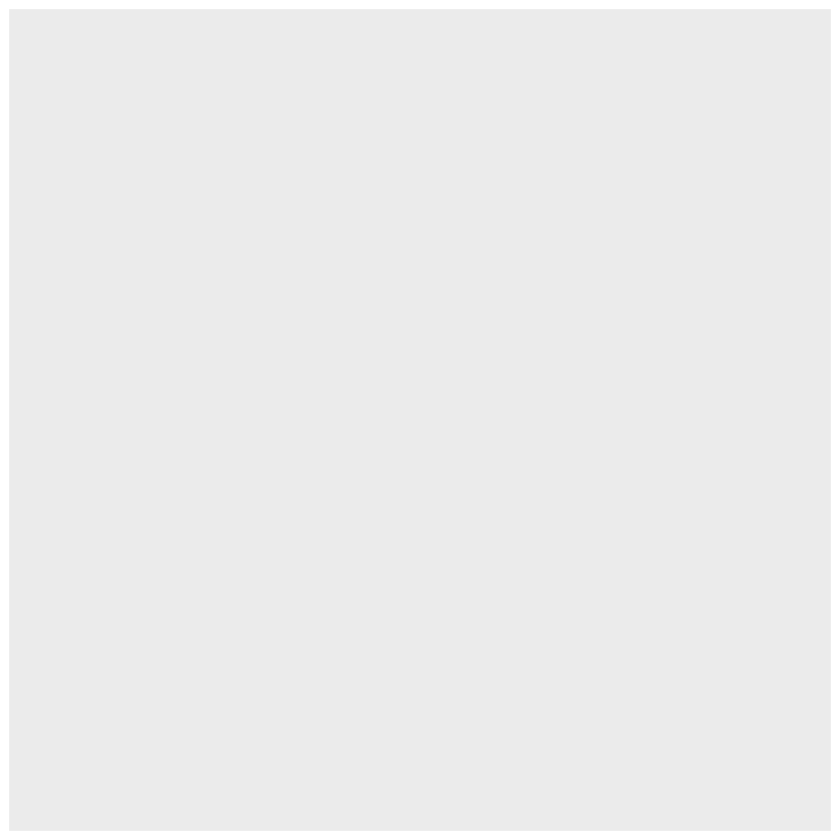

In [23]:
iris %>%
  ggplot()

Alternatively, you can write this explicitly as:

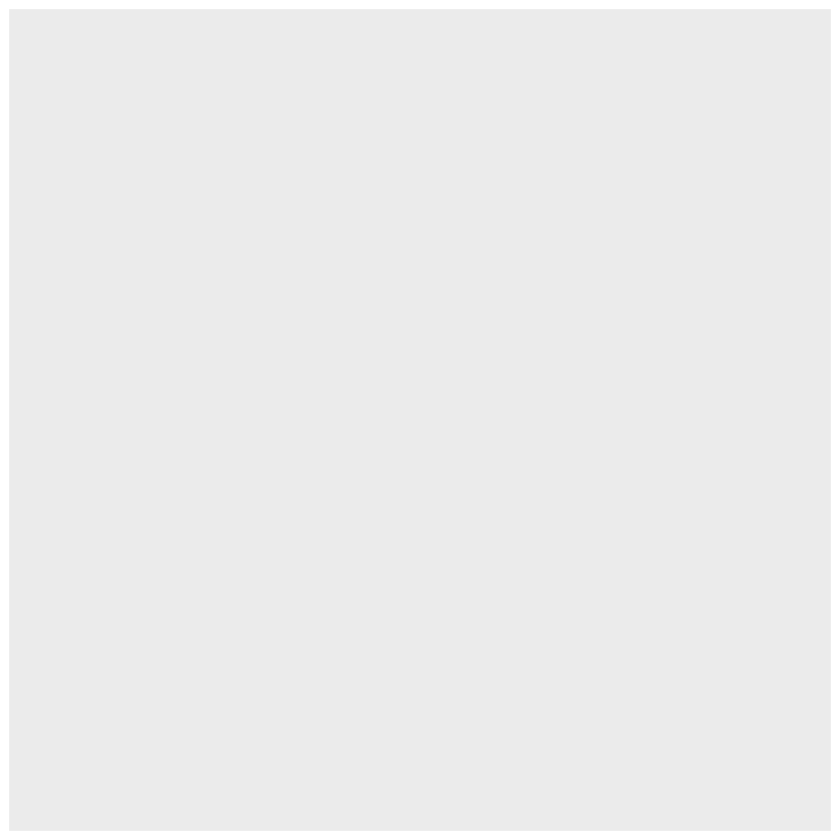

In [24]:
ggplot(data = iris)

#### **Second LEGO Block: Aesthetics**

The aesthetics block `aes()` is like setting up the grid and rules of your LEGO baseplate — it defines how data variables map to visual properties on the plot.

For example:
- `x = Sepal.Width` defines what data goes along the horizontal axis (x-axis).
- `y = Petal.Length` defines what data goes along the vertical axis (y-axis).
- `color = Species` decides how points are colored based on their group.

Yes, `ggplot2` natively understand column names. In fact, `ggplot2` and `dplyr` belong to a bigger family called `tidyverse`.

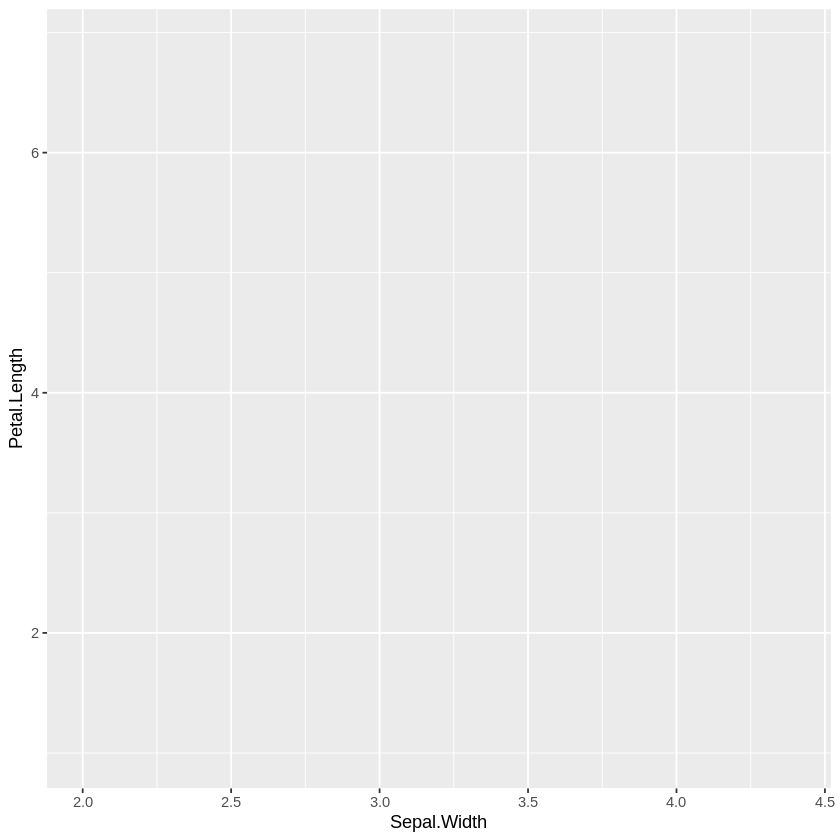

In [25]:
iris %>%
  ggplot(aes(x = Sepal.Width, y = Petal.Length, color = Species))

#### **Third LEGO Block: The Actual Plot**

The third block defines the type of plot or visual representation you want — this is called a `geom` (geometric object). It tells `ggplot2` how to draw your data on the axes set up by the aesthetics.

Examples of `geom` include:
- `geom_point()` for scatter-plots
- `geom_line()` for line plots
- `geom_bar()` for bar charts
- `geom_histogram()` for histograms
and many more

Without adding a geom, your plot has no visual marks — just empty axes.

From now, we use the `+` operator in `ggplot2` to add layers onto our plot one by one.

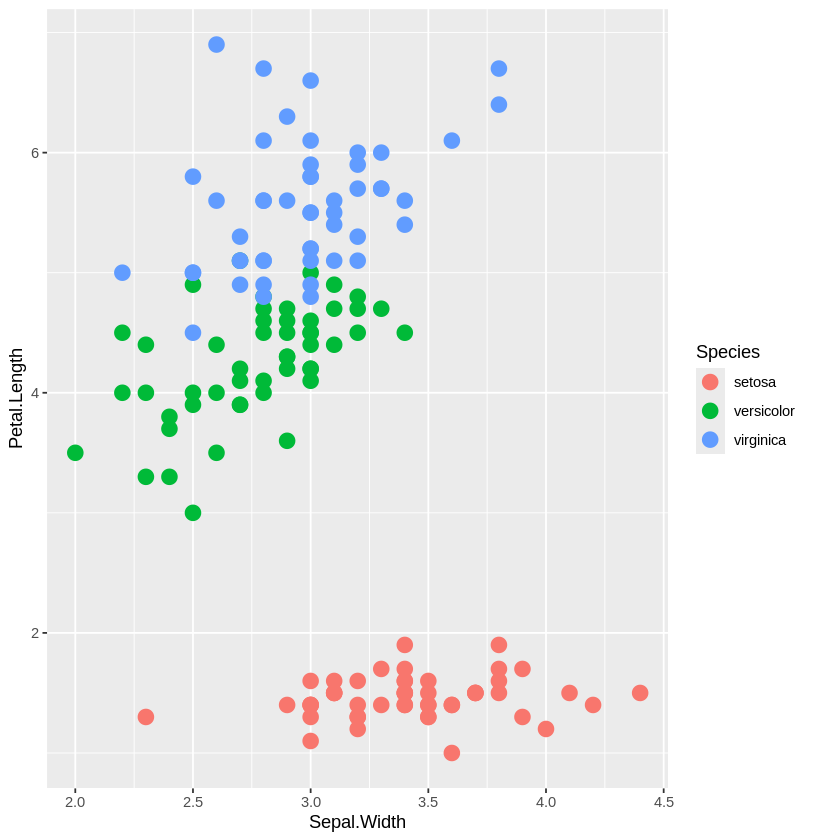

In [26]:
iris %>%
  ggplot(aes(x = Sepal.Width, y = Petal.Length, color = Species)) +
  geom_point(size = 4)

#### **Fourth LEGO Block: Customisation**

The fourth block in `ggplot2` is all about customizing the appearance and style of your plot.

This includes things like:

- Adding titles, axis labels, and captions using `labs()`
- Changing the theme (background, grid lines, fonts) with functions like `theme_minimal()`, `theme_classic()`, or customising with `theme()`
- Adjusting scales for axes, colors, and sizes (e.g., `scale_color_manual()`, `scale_x_continuous()`)
- Adding facets to create small multiples (`facet_wrap()`, `facet_grid()`)

This block is like painting and decorating your LEGO model — after you’ve built the structure, you choose colors, textures, and details to make it look exactly how you want.

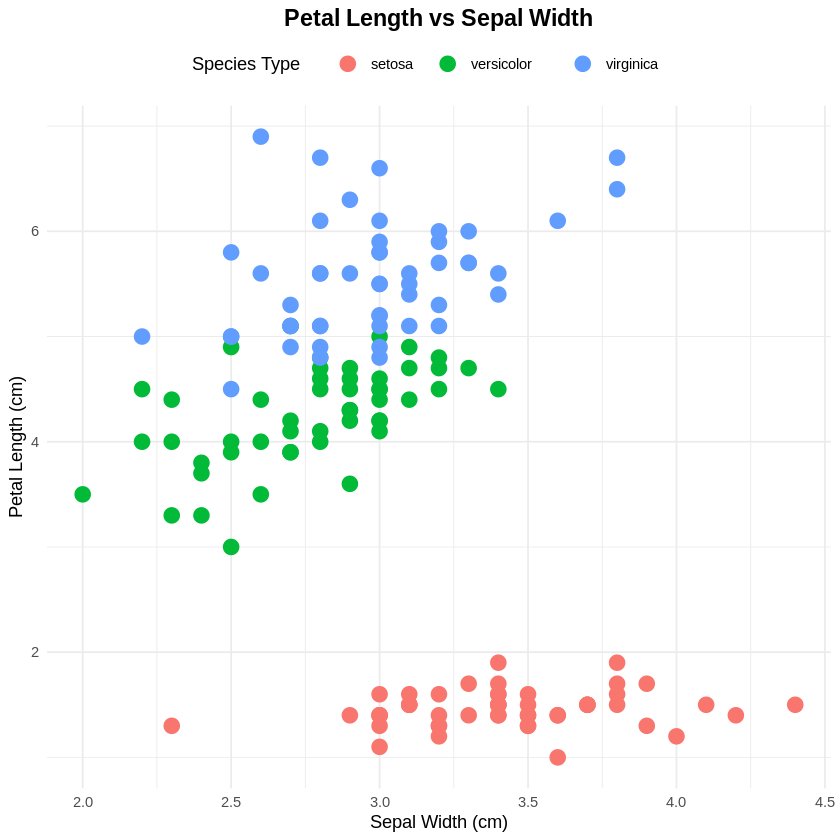

In [27]:
iris %>%
  ggplot(aes(x = Sepal.Width, y = Petal.Length, color = Species)) +
  geom_point(size = 4) +
  labs(
    title = "Petal Length vs Sepal Width",
    x = "Sepal Width (cm)",
    y = "Petal Length (cm)",
    color = "Species Type"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    legend.position = "top"
  )


#### **Exercise**

Create a scatter plot of `Sepal.Length` vs `Setal.Width`, colored by `Species`. Follow the same block-based `ggplot2` structure we discussed.


<details>
<summary>▶️ Click to show the solution</summary>

```r
iris %>%
  ggplot(aes(x = Sepal.Width, y = Setal.Length, color = Species)) +
  geom_point(size = 4) +
  labs(
    title = "Setal Length vs Sepal Width",
    x = "Sepal Width (cm)",
    y = "Setal Length (cm)",
    color = "Species Type"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    legend.position = "top"
  )
```

</details>

### **Visualising Subgroups with `facet_wrap()`**

Assume that you want to create a scatter plot of `Petal.Length` vs `Sepal.Width`, however, for each species separately.

One approach is to split the dataset by `Species`, extract the `Petal.Length` and `Sepal.Width` columns for each group, create a separate scatter plot for each, and then combine or "stack" the plots to compare across species. This is not convenient.

`facet_wrap()` simplifies the process.

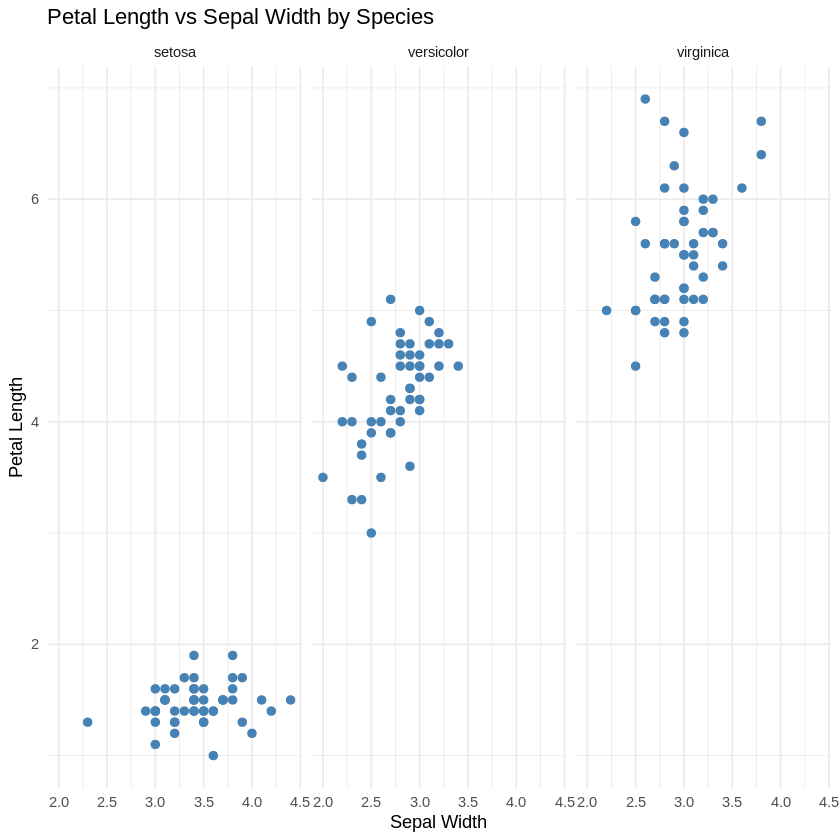

In [29]:
iris %>%
  ggplot(aes(x = Sepal.Width, y = Petal.Length)) +
  geom_point(color = "steelblue", size = 2) +
  facet_wrap(~ Species) +
  theme_minimal() +
  labs(
    title = "Petal Length vs Sepal Width by Species",
    x = "Sepal Width",
    y = "Petal Length"
  )

### **When Long-Format Data Are Needed**

Suppose you want to plot `Sepal.Length` and `Petal.Length` values on the y-axis against `Sepal.Width` on the x-axis separately.

Wide-format `iris` won't work in this case because `Sepal.Length` and `Petal.Length` are different columns — `ggplot` doesn’t know how to treat them as the same variable. Here, we can't set `y = c("Sepal.Length", "Petal.Length")` for example — it simply doesn't work.

**Solution**: We need to convert `iris` to long-format.

In [30]:
iris %>%
  select(Sepal.Length, Sepal.Width, Petal.Length, Species) %>%
  pivot_longer(
    cols = c(Sepal.Length, Petal.Length),
    names_to = "Measurement",
    values_to = "Length"
  ) -> long_iris

long_iris %>%
  head()

Sepal.Width,Species,Measurement,Length
<dbl>,<chr>,<chr>,<dbl>
3.5,setosa,Sepal.Length,5.1
3.5,setosa,Petal.Length,1.4
3.0,setosa,Sepal.Length,4.9
3.0,setosa,Petal.Length,1.4
3.2,setosa,Sepal.Length,4.7
3.2,setosa,Petal.Length,1.3


Now, it is possible to set`x = Measurement` as the x-axis of the plot.

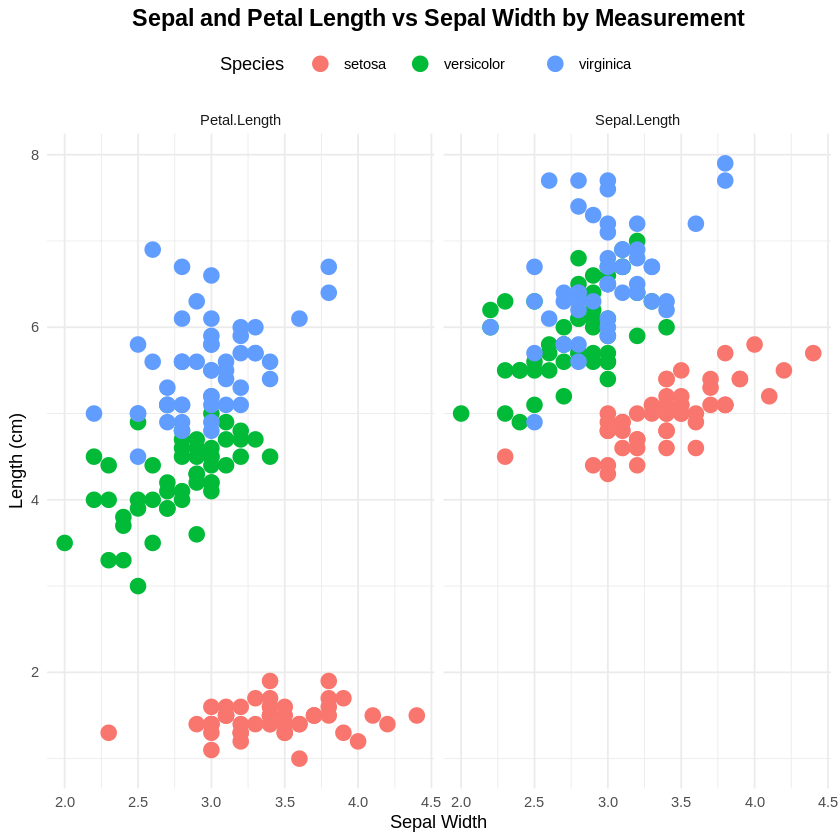

In [31]:
long_iris %>%
  ggplot(aes(x = Sepal.Width, y = Length, color = Species)) +
  geom_point(size = 4) +
  facet_wrap(~ Measurement) +
  labs(
    title = "Sepal and Petal Length vs Sepal Width by Measurement",
    x = "Sepal Width",
    y = "Length (cm)"
  ) +
  theme_minimal()+
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    legend.position = "top"
  )

## **Workshop Questions**


### **EPA Fuel Economy Dataset**

A dataset containing information on over 13,500 cars sold in the US from 2010 to 2020, including measurements and characteristics related to vehicle fuel economy and specifications. Data sourced from the [US Fuel Economy website](https://www.fueleconomy.gov/feg/download.shtml).

| Variable | Description                                    |
|----------|------------------------------------------------|
| `city`   | EPA measured fuel economy in miles per gallon (city driving) |
| `hwy`    | EPA measured fuel economy in miles per gallon (highway driving) |
| `cyl`    | Number of cylinders in the engine              |
| `disp`   | Engine displacement (litres)                    |
| `drive`  | Vehicle drivetrain layout (e.g., FWD, RWD, AWD) |
| `make`   | Vehicle manufacturer name                       |
| `model`  | Vehicle model name                              |
| `trans`  | Transmission type (manual or automatic)        |
| `year`   | Vehicle model year                              |


In [32]:
epa_data = read.csv("./datasets/epa_data.csv")
str(epa_data)

'data.frame':	13569 obs. of  9 variables:
 $ city : int  16 15 16 19 19 19 19 19 19 19 ...
 $ hwy  : int  24 22 22 27 29 24 26 27 29 24 ...
 $ cyl  : int  8 8 8 4 4 4 4 4 4 4 ...
 $ disp : num  5 5 5 2 2 2.4 2.4 2 2 2.4 ...
 $ drive: chr  "Rear-Wheel Drive" "Rear-Wheel Drive" "Rear-Wheel Drive" "Rear-Wheel Drive" ...
 $ make : chr  "Jaguar" "Jaguar" "Jaguar" "Pontiac" ...
 $ model: chr  "XK" "XK" "XK Convertible" "Solstice" ...
 $ trans: chr  "Automatic" "Automatic" "Automatic" "Automatic" ...
 $ year : int  2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...


### **Question 1**

Suppose you want to compare the fuel economy in city driving between manual and automatic transmissions using the EPA dataset.
- What type of graphical summary would best display this comparison?
- Use `ggplot` to produce this visualisation.

**Hint**:
- Only specify the x-axis inside `ggplot(aes())`.
- Use `geom_histogram(aes(y = after_stat(density)))` to plot normalised histograms for comparison (y-axis is defined here).
- Use `facet_wrap()` to create small multiples.

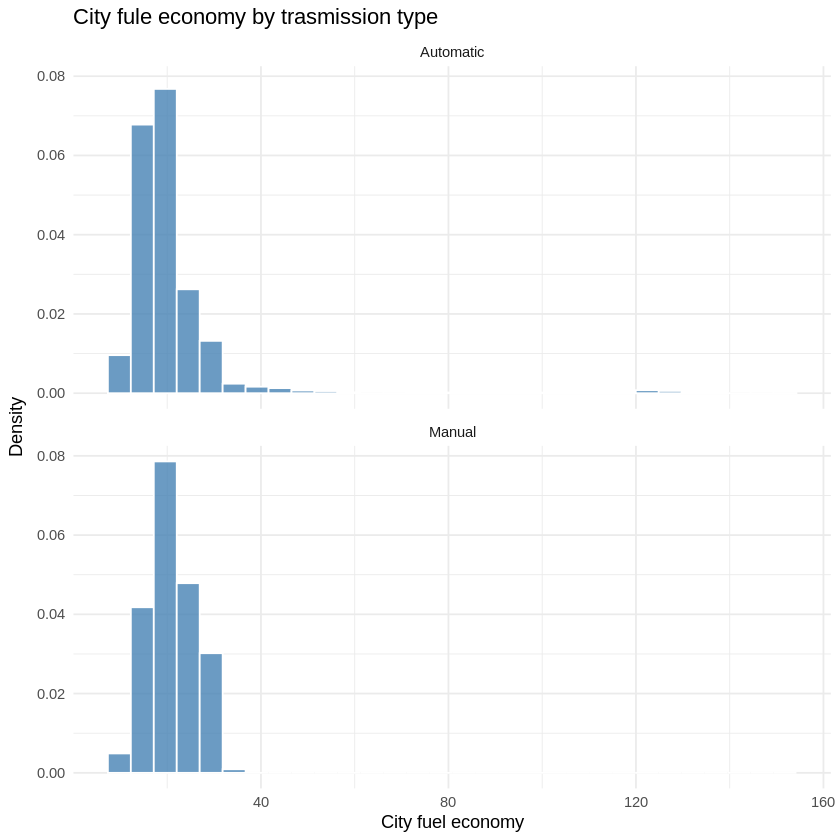

In [33]:
epa_data %>%
  ggplot(aes(x = city)) +
  geom_histogram(aes(y=after_stat(density)), bins = 30, color = "white", fill = "steelblue",  alpha =0.8) +
  facet_wrap(~ trans, ncol = 1) +
  labs(title = "City fule economy by trasmission type",x="City fuel economy",y ="Density") +
  theme_minimal()

<details>
<summary>▶️ Click to show the solution</summary>

```r
Solution will be released at the end of the week!
```

</details>

### **Question 2**


Suppose you want to compare the combined fuel economy (city and highway driving) between manual and automatic transmissions using the EPA dataset.

- What steps would you take to prepare the data?
- What type of graphical summary would best display this comparison?
- Use `ggplot` to produce this visualisation.

**Hint**: We need a new `long-format` data frame.


In [ ]:
epa_data %>%
  ggplot(aes())+



<details>
<summary>▶️ Click to show the solution</summary>

```r
Solution will be released at the end of the week!
```

</details>

### **Question 3**

Suppose that you want to explore how engine displacement changed over time.

- What type of graph or chart would you use and why?
- Use `ggplot` to produce this graphical summary.

**Hint**:
- Use `stat_summary(func = "mean", geom = "line")` instead of `geom_line`.
- A simpler approach is to use `group_by() %>% summarise()`. Use `na.rm = TRUE` option in `mean()`.

<details>
<summary>▶️ Click to show the solution </summary>

Solution will be released at the end of the week!

</details>

### **Question 4**

Suppose you want to identify which manufacturers produced the most fuel-efficient cars given city driving EPA in the `epa_data` dataset.

- Use `group_by() %>% summarise()` to summarise `EPA` by manufacturer. Name the summary column `mean_mpg`.

<details>
<summary>▶️ Click to show the solution </summary>

Solution will be released at the end of the week!

</details>

- Use `ggplot` to create a Pareto plot (i.e., a sorted bar chart) to support your analysis? Is the plot descriptive enough?

**Hint**:  Use `ggplot(aes(x = reorder(make,-mean_mpg)))` to make sure `make` is the x-asis but sorted by `-mean_mpg` (e.g., larger values come first).

<details>
<summary>▶️ Click to show the solution </summary>

Solution will be released at the end of the week!

</details>

- How might you improve the previous plot to better answer the question?

**Hint**: Use `slice_max(order_by = mean_mpg, n)` to select top `n` manufacturers based on `-mean_mpg`.

<details>
<summary>▶️ Click to show the solution </summary>

Solution will be released at the end of the week!

</details>